In [9]:
import pandas as pd
file = pd.read_csv('insurance.csv',sep=',')
file.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

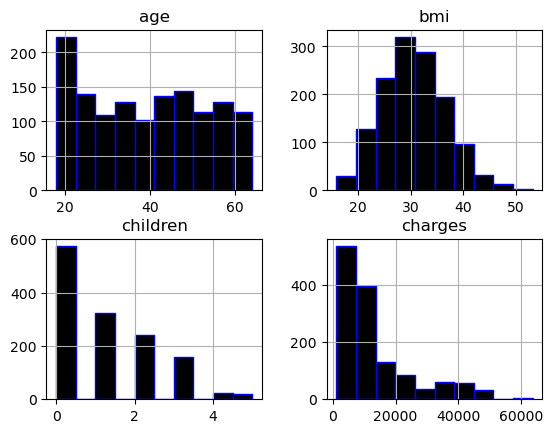

In [10]:
file.hist(color = 'black', edgecolor = 'blue')

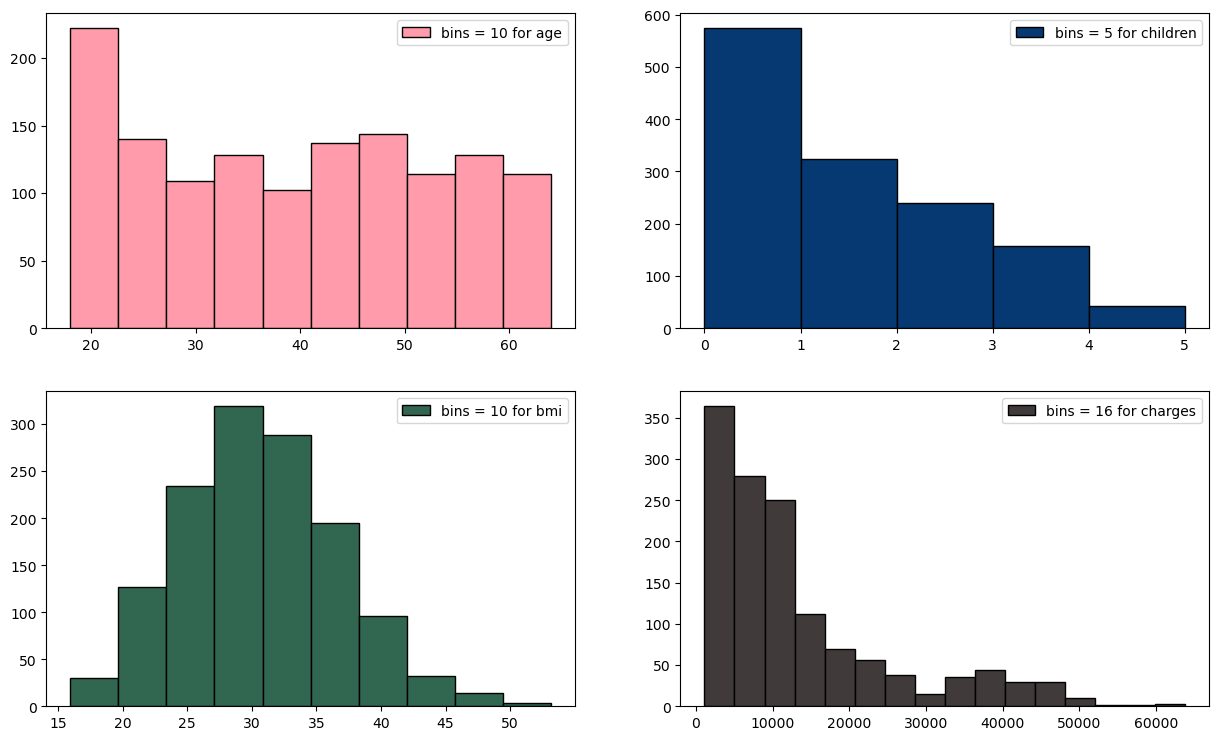

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2, figsize=(15,9))
ax[0][0].hist(file['age'], edgecolor = 'black', color = '#ff9baa', bins = 10, label = 'bins = 10 for age')
ax[0][0].legend()
ax[0][1].hist(file['children'], edgecolor = 'black', color = '#063971', bins = 5, label = 'bins = 5 for children')
ax[0][1].legend()
ax[1][0].hist(file['bmi'], edgecolor = 'black', color = '#316650', bins = 10, label = 'bins = 10 for bmi')
ax[1][0].legend()
ax[1][1].hist(file['charges'], edgecolor = 'black', color = '#403a3a', bins = 16, label = 'bins = 16 for charges')
ax[1][1].legend()
plt.show()

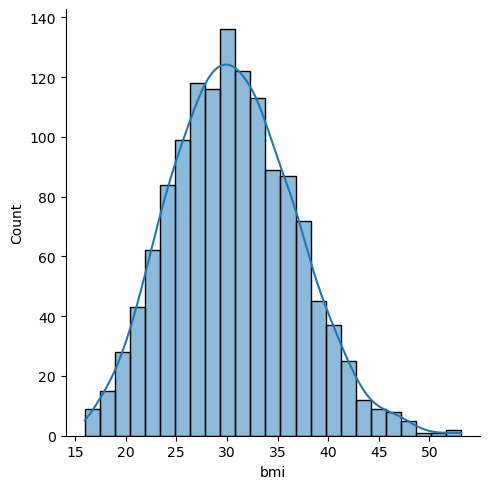

In [17]:
import seaborn as sns
sns.displot(file['bmi'], kde = True)

In [16]:
import numpy as np
import scipy.stats as sts

mean_bmi = np.mean(file['bmi'])
mean_ch = np.mean(file['charges'])

moda_bmi = sts.mode(file['bmi'])
moda_ch = sts.mode(file['charges'])

med_bmi = np.median(file['bmi'])
med_ch = np.median(file['charges'])

print('Среднее для индекса массы тела = ', round(mean_bmi,3), ', для расходов = ', round(mean_ch,3), '\n')
print('Мода для индекса массы тела = ', moda_bmi, ',\nдля расходов = ', moda_ch, '\n')
print('Медиана для индекса массы тела = ', round(med_bmi,3), ', для расходов = ', round(med_ch,3), '\n')

#Для индекса массы тела
std_bmi = file['bmi'].std()
raz_bmi = file['bmi'].max()-file['bmi'].min()
q1_bmi = np.percentile(file['bmi'],25,interpolation='midpoint')
q3_bmi = np.percentile(file['bmi'],75,interpolation='midpoint')
iqr1_bmi = q3_bmi - q1_bmi
iqr2_bmi = sts.iqr(file['bmi'], interpolation = 'midpoint')
#Для расходов
std_ch = file['charges'].std()
raz_ch = file['charges'].max()-file['charges'].min()
q1_ch = np.percentile(file['charges'],25,interpolation='midpoint')
q3_ch = np.percentile(file['charges'],75,interpolation='midpoint')
iqr1_ch = q3_ch - q1_ch
iqr2_ch = sts.iqr(file['charges'], interpolation = 'midpoint')

print('Стандартное отклонение для индекса массы тела: ', std_bmi, ', для расходов: ', std_ch, '\n')
print('Размах для индекса массы тела: ', raz_bmi, ', для расходов: ', raz_ch, '\n')
print('Межквартильный размах через numpy для индекса массы тела: ', iqr1_bmi, ', для расходов: ', iqr1_ch, '\n')
print('Межквартильный размах через scipy для индекса массы тела: ', iqr2_bmi, ', для расходов: ', iqr2_ch, '\n')

Среднее для индекса массы тела =  30.663 , для расходов =  13270.422 

Мода для индекса массы тела =  ModeResult(mode=array([32.3]), count=array([13])) ,
для расходов =  ModeResult(mode=array([1639.5631]), count=array([2])) 

Медиана для индекса массы тела =  30.4 , для расходов =  9382.033 

Стандартное отклонение для индекса массы тела:  6.098186911679017 , для расходов:  12110.011236693994 

Размах для индекса массы тела:  37.17 , для расходов:  62648.554110000005 

Межквартильный размах через numpy для индекса массы тела:  8.384999999999998 , для расходов:  11879.80148 

Межквартильный размах через scipy для индекса массы тела:  8.384999999999998 , для расходов:  11879.80148 



C:\Users\79537\AppData\Local\Temp\ipykernel_12064\957542292.py:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  moda_bmi = sts.mode(file['bmi'])
C:\Users\79537\AppData\Local\Temp\ipykernel_12064\957542292.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  moda_ch

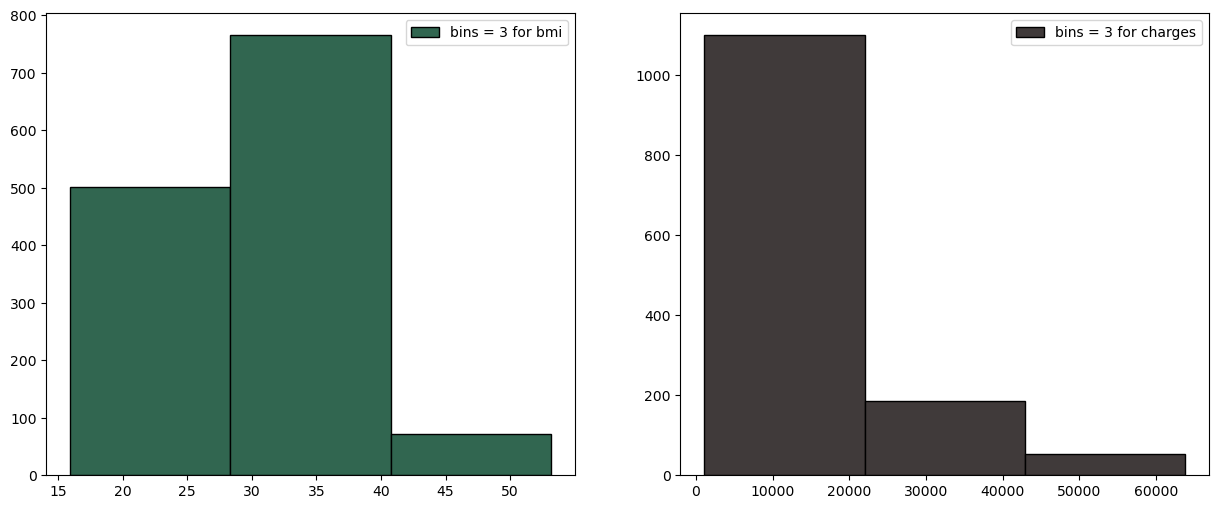

In [32]:
fig, ax = plt.subplots(1,2, figsize=(15,6))

ax[0].hist(file['bmi'], edgecolor = 'black', color = '#316650', bins = 3, label = 'bins = 3 for bmi')
ax[0].legend()
ax[1].hist(file['charges'], edgecolor = 'black', color = '#403a3a', bins = 3, label = 'bins = 3 for charges')
ax[1].legend()
plt.show()

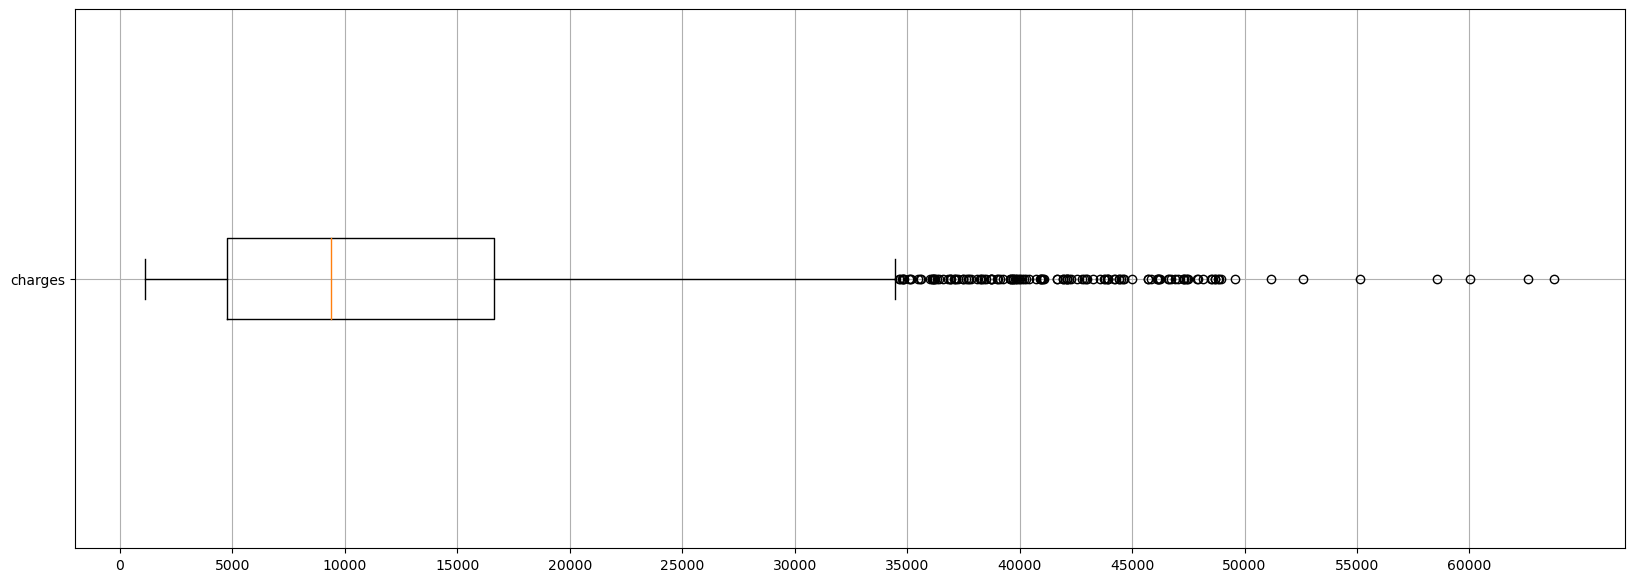

In [44]:
plt.figure(figsize=(20,7))
plt.boxplot([file['charges']],
           labels=['charges'],vert = False)
plt.xticks(np.arange(0,64000,5000))
#plt.scatter(file['charges'],rand,s=1.5)
plt.grid()
plt.show()

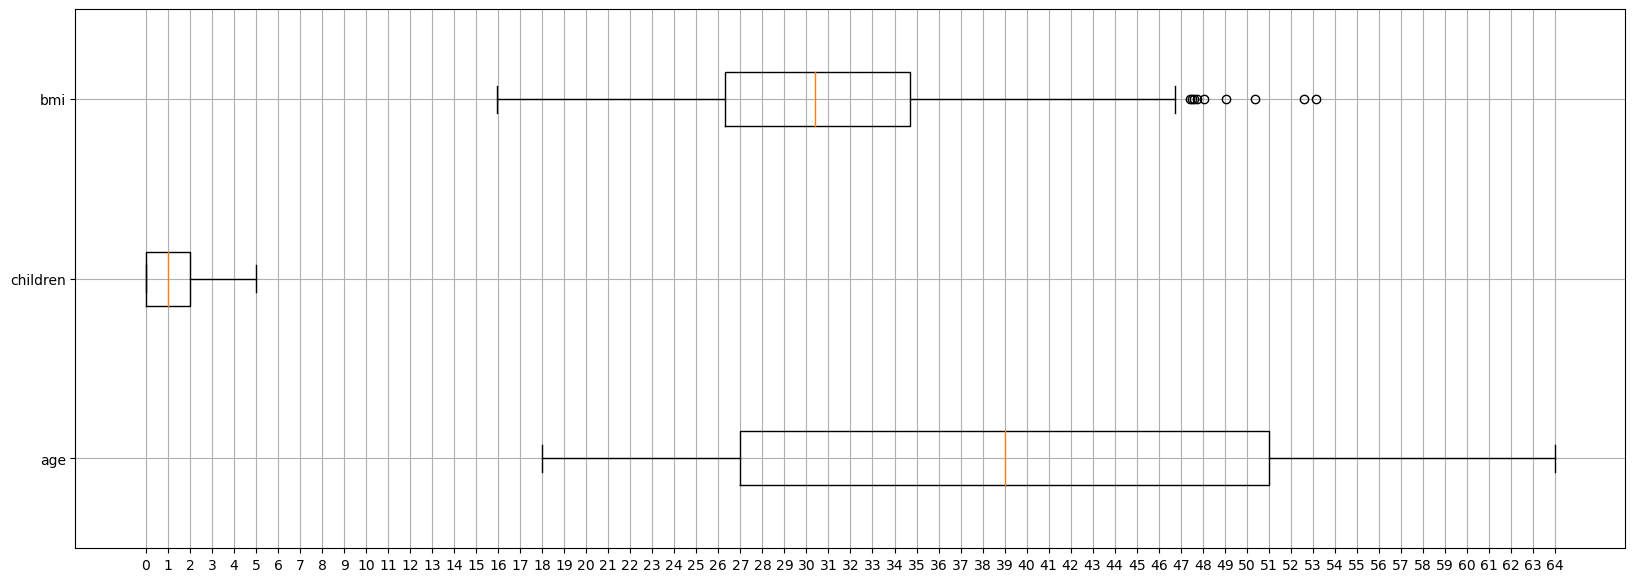

In [46]:
plt.figure(figsize=(20,7))
plt.boxplot([file['age'],file['children'],file['bmi']],
           labels=['age','children','bmi'],vert = False)
plt.xticks(np.arange(0,65,1))
#plt.scatter(file['charges'],rand,s=1.5)
plt.grid()
plt.show()

<Axes: >

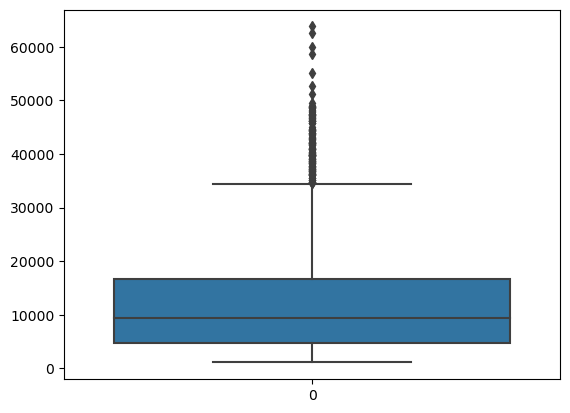

In [49]:
sns.boxplot(file['charges'])

стандартное отклонение для размера выборки  10   1.927695255344796
среднее значение для размера выборки  10   30.506049999999995
стандартное отклонение для размера выборки  30   1.1129553745888823
среднее значение для размера выборки  30   30.593047777777773
стандартное отклонение для размера выборки  50   0.8620915261709557
среднее значение для размера выборки  50   30.640168666666668
стандартное отклонение для размера выборки  100   0.6095907641589429
среднее значение для размера выборки  100   30.706987333333334
30.66339686098655
0.16665192006836474


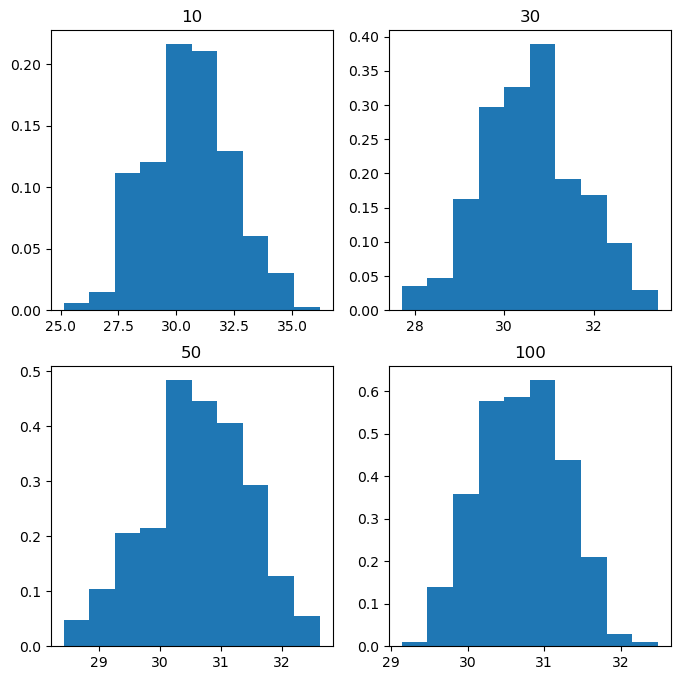

In [54]:
# зададим точку отсчета
np.random.seed(42)
 
# создадим список, в который будем записывать выборочные средние
sample_means = []
 
# зададим количество и размер выборок
n_samples = 300
size = [10, 30, 50, 100]

for j in size:
    # в цикле будем формировать выборки путем отбора нужного количества элементов из генеральной совокупности
    sample = [np.mean(np.random.choice(file['bmi'], j, replace = False)) for i in range(n_samples)]
    # для каждой выборки рассчитаем среднее значение и поместим в список выборочных средних
    sample_means.append(sample)
k = 0
fig, ax = plt.subplots(2, 2, figsize =(8, 8))
for i in range(0, 2):
    for j in range(0, 2):
        ax[i, j].hist(sample_means[k], 10, density = True)
        ax[i, j].set_title(label = size[k])
        print('стандартное отклонение для размера выборки ',size[k],' ',np.std(file['bmi'])/np.sqrt(size[k]))
        print('среднее значение для размера выборки ',size[k],' ',np.mean(sample_means[k]))
        k = k + 1
print(np.mean(file['bmi']))
print(np.std(file['bmi'])/np.sqrt(len((file['bmi']))))
plt.show()

стандартное отклонение для размера выборки  10   3828.090470372242
среднее значение для размера выборки  10   13199.644210742665
стандартное отклонение для размера выборки  30   2210.149063551655
среднее значение для размера выборки  30   13180.401071215667
стандартное отклонение для размера выборки  50   1711.9741031542956
среднее значение для размера выборки  50   13162.866394325269
стандартное отклонение для размера выборки  100   1210.5484975561606
среднее значение для размера выборки  100   13351.659060162201
13270.422265141257
330.943713906084


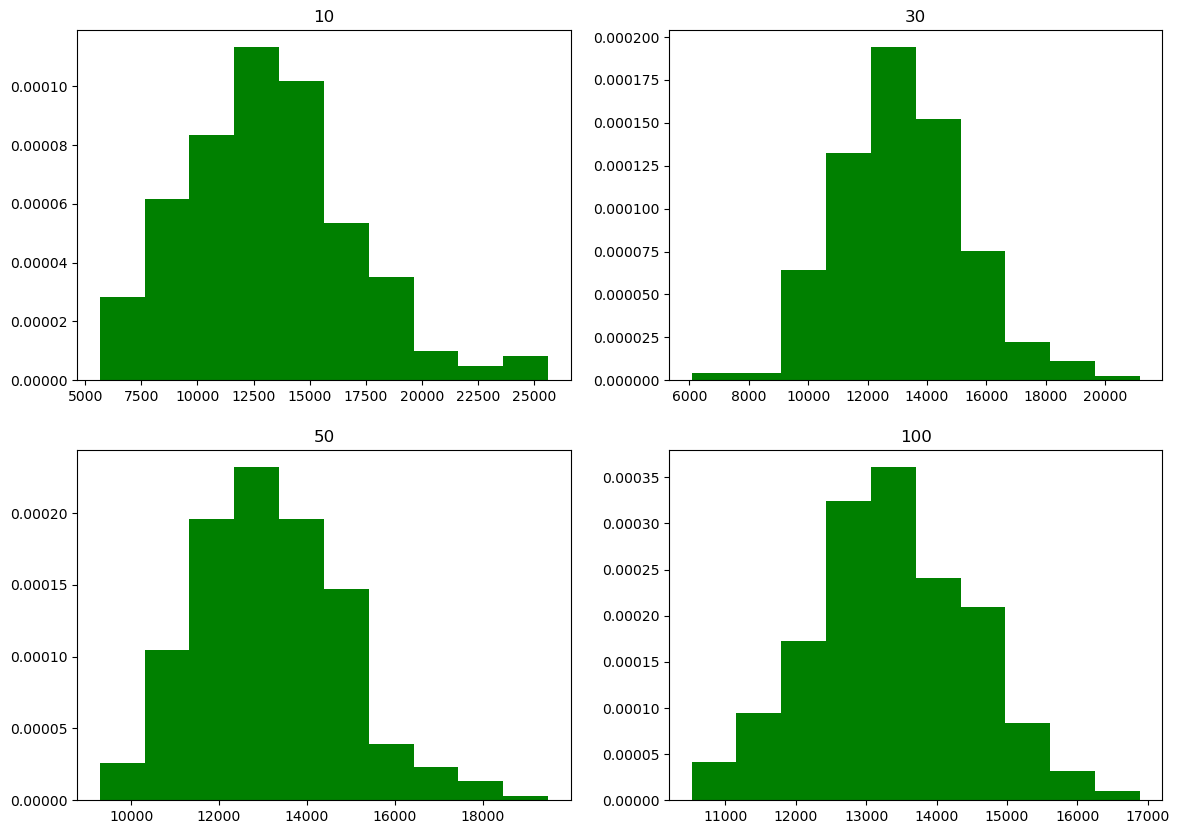

In [55]:
# зададим точку отсчета
np.random.seed(42)
 
# создадим список, в который будем записывать выборочные средние
sample_means_ch = []
 
# зададим количество и размер выборок
n_samples = 300
size = [10, 30, 50, 100]

for j in size:
    # в цикле будем формировать выборки путем отбора нужного количества элементов из генеральной совокупности
    sample = [np.mean(np.random.choice(file['charges'], j, replace = False)) for i in range(n_samples)]
    # для каждой выборки рассчитаем среднее значение и поместим в список выборочных средних
    sample_means_ch.append(sample)
k = 0
fig, ax = plt.subplots(2, 2, figsize =(14, 10))
for i in range(0, 2):
    for j in range(0, 2):
        ax[i, j].hist(sample_means_ch[k], 10, density = True, color='green')
        ax[i, j].set_title(label = size[k])
        print('стандартное отклонение для размера выборки ',size[k],' ',np.std(file['charges'])/np.sqrt(size[k]))
        print('среднее значение для размера выборки ',size[k],' ',np.mean(sample_means_ch[k]))
        k = k + 1
print(np.mean(file['charges']))
print(np.std(file['charges'])/np.sqrt(len((file['charges']))))
plt.show()

In [49]:
import numpy as np
import scipy.stats as st

sample_bmi = [np.mean(np.random.choice(file['bmi'], 50, replace = False)) for i in range(n_samples)]
#create 95% confidence interval for population mean weight
print('95% доверительный интервал для среднего значения индекса массы тела')
print(st.norm.interval(confidence=0.95, loc=np.mean(sample_bmi), scale=st.sem(sample_bmi)))
print('99% доверительный интервал для среднего значения индекса массы тела')
print(st.norm.interval(confidence=0.99, loc=np.mean(sample_bmi), scale=st.sem(sample_bmi)))
sample_ch = [np.mean(np.random.choice(file['charges'], 30, replace = False)) for i in range(n_samples)]
print('95% доверительный интервал для среднего значения расходов')
print(st.t.interval(0.95, df=len(sample_ch)-1, loc=np.mean(sample_ch), scale=st.sem(sample_ch)))
print('99% доверительный интервал для среднего значения расходов')
print(st.t.interval(0.99, df=len(sample_ch)-1, loc=np.mean(sample_ch), scale=st.sem(sample_ch)))

95% доверительный интервал для среднего значения индекса массы тела
(30.55697258170708, 30.748445418292924)
99% доверительный интервал для среднего значения индекса массы тела
(30.526890018834596, 30.778527981165407)
95% доверительный интервал для среднего значения расходов
(12795.793437785851, 13287.291449331038)
99% доверительный интервал для среднего значения расходов
(12717.81501410367, 13365.26987301322)


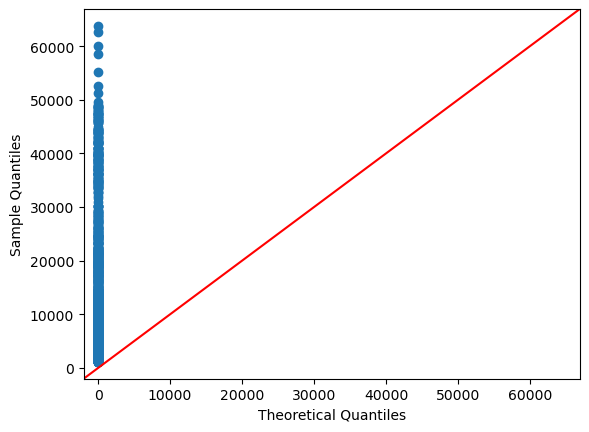

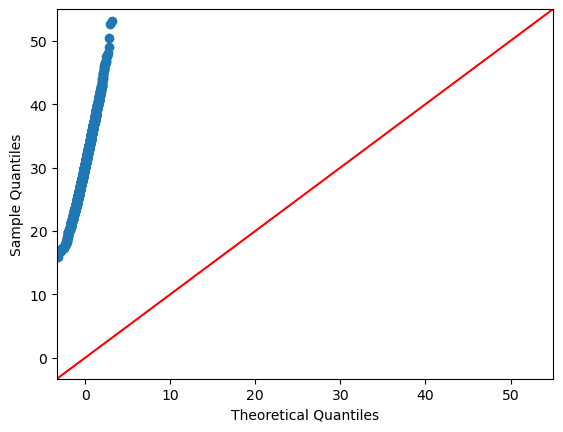

In [51]:
import statsmodels.api as sm

#create Q-Q plot with 45-degree line added to plot
fig1 = sm.qqplot(file['charges'], line='45')
fig2 = sm.qqplot(file['bmi'], line='45')
plt.show()

In [58]:
from scipy import stats
ks_bmi = stats.kstest(sample_means[2],'norm')
print(ks_bmi)
ks_ch = stats.kstest(sample_means_ch[2],'norm')
print(ks_ch)

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=28.427, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=9286.3828232, statistic_sign=-1)


In [87]:
data=pd.read_csv('ECDCCases.csv',sep=',')
data.describe()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,61904.000000,61904.000000,61904.000000,61904.000000,61904.000000,6.178100e+04,59025.000000
mean,15.629232,7.067104,2019.998918,1155.079026,26.053987,4.098628e+07,66.316369
std,8.841624,2.954816,0.032881,6779.010824,131.222948,1.531246e+08,162.324550
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02,-147.419587
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.293120e+06,0.757526
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06,6.724045
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.851583e+07,52.561206
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09,1900.836210


In [73]:
for col in data.columns:
    missing = np.mean(data[col].isna()*100)
    print(f" {col} : {round(missing,1)}%")

 dateRep : 0.0%
 day : 0.0%
 month : 0.0%
 year : 0.0%
 cases : 0.0%
 deaths : 0.0%
 countriesAndTerritories : 0.0%
 countryterritoryCode : 0.0%
 popData2019 : 0.0%
 continentExp : 0.0%


In [88]:
data.drop('Cumulative_number_for_14_days_of_COVID-19_cases_per_100000',axis=1,inplace=True)
data.drop('geoId',axis=1,inplace=True)

In [69]:
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2019,continentExp
0,14/12/2020,14,12,2020,746,6,Afghanistan,AFG,38041757.0,Asia
1,13/12/2020,13,12,2020,298,9,Afghanistan,AFG,38041757.0,Asia
2,12/12/2020,12,12,2020,113,11,Afghanistan,AFG,38041757.0,Asia
3,12/12/2020,12,12,2020,113,11,Afghanistan,AFG,38041757.0,Asia
4,11/12/2020,11,12,2020,63,10,Afghanistan,AFG,38041757.0,Asia


In [89]:
data.countryterritoryCode.fillna("other",inplace=True)

In [91]:
popData = data.popData2019.median()
data.popData2019.fillna(popData,inplace=True)

<Axes: >

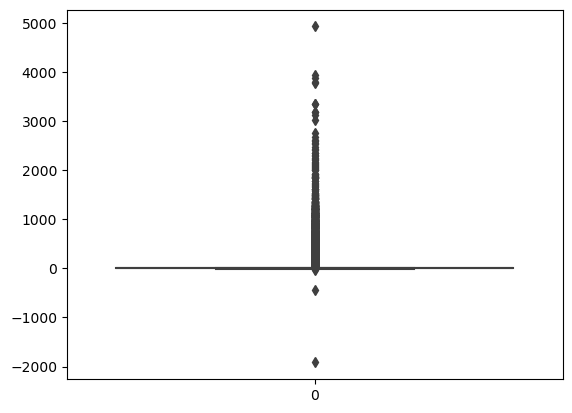

In [79]:
sns.boxplot(data['deaths'])

<Axes: >

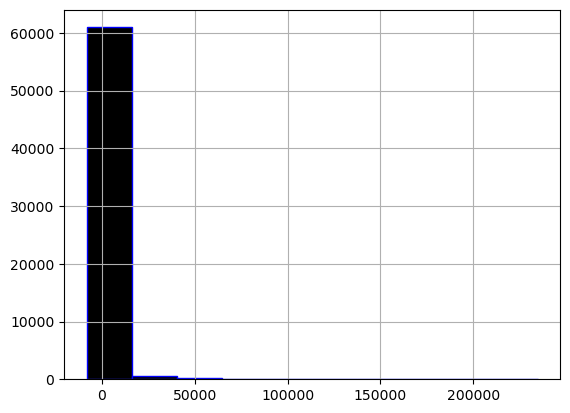

In [83]:
data['cases'].hist(color = 'black', edgecolor = 'blue')

In [100]:
data.describe()

,day,month,year,cases,deaths,popData2019
count,61879.000000,61879.000000,61879.000000,61879.000000,61879.000000,6.187900e+04
mean,15.630052,7.067438,2019.998917,1155.731460,26.030802,4.092651e+07
std,8.841625,2.955157,0.032888,6780.200822,130.110996,1.530097e+08
min,1.000000,1.000000,2019.000000,0.000000,0.000000,8.150000e+02
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.324820e+06
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06
75%,23.000000,10.000000,2020.000000,274.000000,4.000000,2.851583e+07
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09


In [99]:
data = data[(data.cases >= 0) & (data.deaths >= 0)]

In [115]:
sub_data = data[data.deaths > 3000]
print("Количество дней = ",sub_data['dateRep'].count())
sub_data = sub_data["countriesAndTerritories"]
print(sub_data)

Количество дней =  10
2118                    Argentina
37038                      Mexico
44888                        Peru
44909                        Peru
59007    United_States_of_America
59009    United_States_of_America
59016    United_States_of_America
59239    United_States_of_America
59245    United_States_of_America
59247    United_States_of_America
Name: countriesAndTerritories, dtype: object


In [116]:
data.head(15)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2019,continentExp
0,14/12/2020,14,12,2020,746,6,Afghanistan,AFG,38041757.0,Asia
1,13/12/2020,13,12,2020,298,9,Afghanistan,AFG,38041757.0,Asia
2,12/12/2020,12,12,2020,113,11,Afghanistan,AFG,38041757.0,Asia
3,12/12/2020,12,12,2020,113,11,Afghanistan,AFG,38041757.0,Asia
4,11/12/2020,11,12,2020,63,10,Afghanistan,AFG,38041757.0,Asia
5,10/12/2020,10,12,2020,202,16,Afghanistan,AFG,38041757.0,Asia
6,09/12/2020,9,12,2020,135,13,Afghanistan,AFG,38041757.0,Asia
7,08/12/2020,8,12,2020,200,6,Afghanistan,AFG,38041757.0,Asia
8,07/12/2020,7,12,2020,210,26,Afghanistan,AFG,38041757.0,Asia
9,06/12/2020,6,12,2020,234,10,Afghanistan,AFG,38041757.0,Asia


In [1]:
data2 = data.countryterritoryCode.drop_dublicates()
data2.head(15)

NameError: name 'data' is not defined

In [10]:
import pandas as pd
import scipy.stats as sts
df=pd.read_csv('bmi.csv',sep=',')

In [11]:
dfn = df[df.region == 'northwest']
dfn=dfn.bmi
dfs = df[df.region == 'southwest']
dfs=dfs.bmi

In [12]:
t_res=sts.ttest_ind(dfn,dfs)
print(t_res)

Ttest_indResult(statistic=-3.2844171500398582, pvalue=0.001076958496307695)


In [13]:
res1 = sts.shapiro(dfn)
res2 = sts.shapiro(dfs)
print(res1, '\n', res2)

ShapiroResult(statistic=0.9954646825790405, pvalue=0.4655335247516632) 
 ShapiroResult(statistic=0.9949268698692322, pvalue=0.3629520535469055)


In [14]:
res = sts.bartlett(dfn,dfs)
print(res)

BartlettResult(statistic=3.4000745256463825, pvalue=0.06519347353580048)


In [18]:
dct={'N':[1,2,3,4,5,6],'Counts':[97,98,109,95,97,104]}
dfr = pd.DataFrame(dct)
dfr['Expected']=100
print(dfr)

   N  Counts  Expected
0  1      97       100
1  2      98       100
2  3     109       100
3  4      95       100
4  5      97       100
5  6     104       100


In [20]:
k=len(dfr.N)-1
diff=dfr.Counts-dfr.Expected
dfr['Difference']=diff
dfr['SquaredDifference']=dfr['Difference']**2
dfr['SquaredDifference/Expected']=dfr['SquaredDifference']/dfr.Expected
print(dfr)
statistic=dfr['SquaredDifference/Expected'].sum()
print('\nСтатистика: ',statistic)
sts.chisquare(dfr['Counts'],dfr['Expected'])

   N  Counts  Expected  Difference  SquaredDifference  \
0  1      97       100          -3                  9   
1  2      98       100          -2                  4   
2  3     109       100           9                 81   
3  4      95       100          -5                 25   
4  5      97       100          -3                  9   
5  6     104       100           4                 16   

   SquaredDifference/Expected  
0                        0.09  
1                        0.04  
2                        0.81  
3                        0.25  
4                        0.09  
5                        0.16  

Статистика:  1.44


Power_divergenceResult(statistic=1.44, pvalue=0.9198882077437889)

In [23]:
dt = pd.DataFrame({'Женат': [89,17,11,43,22,1],
                    'Гражданский брак': [80,22,20,35,6,4],
                    'Не состоит в отношениях': [35,44,35,6,8,22]})
dt.index = ['Полный рабочий день','Частичная занятость','Временно не работает','На домохозяйстве','На пенсии','Учёба']
print(dt)
sts.chi2_contingency(dt)

                      Женат  Гражданский брак  Не состоит в отношениях
Полный рабочий день      89                80                       35
Частичная занятость      17                22                       44
Временно не работает     11                20                       35
На домохозяйстве         43                35                        6
На пенсии                22                 6                        8
Учёба                     1                 4                       22


Chi2ContingencyResult(statistic=122.29654948595365, pvalue=1.7291616900960234e-21, dof=10, expected_freq=array([[74.664, 68.136, 61.2  ],
       [30.378, 27.722, 24.9  ],
       [24.156, 22.044, 19.8  ],
       [30.744, 28.056, 25.2  ],
       [13.176, 12.024, 10.8  ],
       [ 9.882,  9.018,  8.1  ]]))